DEscargamos librerias faltantes

In [24]:
!pip install langdetect
from langdetect import detect
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [30]:
import re
import json
from datetime import datetime
import pandas as pd
import numpy as np
import ast
from textblob import TextBlob
from langdetect import detect
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Al tratar de abrir archivo australian_user_reviews.json posee demasiados errores así que se procede a separar palabras, se cambia  comillas simples por dobles ,se compone las separaciones y gradamos el resultado en un archivó para los datos y otro para los errores que no se pudieron corregir.

In [31]:
import json
import re
import ast

entries = []
errores = []

# Función para separar el campo de reseñas útiles entre las que fueron útiles y las que no lo fueron
def extraer_utilidad(helpful_text):
    match = re.match(r"(\d+) of (\d+) people", helpful_text)
    if match:
        util = int(match.group(1))
        total = int(match.group(2))
        return {'util': util, 'total': total}
    return {'util': 0, 'total': 0}

# Abrir archivo JSON
with open('/content/australian_user_reviews.json', 'r', encoding='utf-8', errors='ignore') as f:
    data = f.read()

# Separar los objetos si están pegados
data = data.replace('}{', '}\n{')

lines = data.strip().split('\n')

for line_number, line in enumerate(lines, 1):
    line = line.strip()
    if not line:
        continue
    try:
        """
        Se utiliza "ast.literal_eval" para evaluar cada línea como un literal de Python,
        lo que nos permitiría procesar cada línea como un objeto JSON válido. Si hay un error,
        se captura más adelante.
        """
        obj = ast.literal_eval(line)
        # Extraemos el user_id, user_url y las reseñas
        user_id = obj.get('user_id', '')
        user_url = obj.get('user_url', '')
        reviews = obj.get('reviews', [])
        # Añadimos user_id, user_url, posted y last_edited a cada reseña
        for review in reviews:
            review['user_id'] = user_id
            review['user_url'] = user_url
            review['posted'] = review.get('posted', '')
            review['last_edited'] = review.get('last_edited', '')
            helpful_text = review.get('helpful', '')
            utilidad = extraer_utilidad(helpful_text)
            review['util'] = utilidad['util']
            review['total'] = utilidad['total']
            entries.append(review)
    except Exception as e:
        # Si hay un error, lo registramos en la línea en el archivo de errores
        print(f'Error al procesar la línea {line_number}: {e}')
        errores.append({
            'line_number': line_number,
            'error': str(e),
            'line': line
        })

# Creamos dos archivos uno donde se guardarán los datos corregidos y otro donde se guardarán los errores para corregirlos después.
with open('/content/australian_user_reviews_coregido.json', 'w', encoding='utf-8') as f:
    json.dump(entries, f, ensure_ascii=False, indent=4)

with open('/content/australian_user_reviews_error.json', 'w', encoding='utf-8') as f:
    json.dump(errores, f, ensure_ascii=False, indent=4)

print('Las reseñas válidas han sido extraídas y guardadas en "australian_user_reviews_coregido.json".')
print('Las líneas problemáticas han sido registradas en "australian_user_reviews_error.json".')


Error al procesar la línea 8610: unterminated string literal (detected at line 1) (<unknown>, line 1)
Error al procesar la línea 8611: closing parenthesis ')' does not match opening parenthesis '{' (<unknown>, line 1)
Las reseñas válidas han sido extraídas y guardadas en "australian_user_reviews_coregido.json".
Las líneas problemáticas han sido registradas en "australian_user_reviews_error.json".


Después de componer el archivo no pudo componerse dos líneas la 8610 y la 8611 al ser poca la información la corregimos manualmente y la sumamos al final



In [32]:
# Informacion corregida
new_data = {
    "user_id": "00000000000000000001227",
    "user_url": "http://steamcommunity.com/id/00000000000000000001227",
    "reviews": [
        {
            "funny": "",
            "posted": "Posted March 12, 2014.",
            "last_edited": "",
            "item_id": "251570",
            "helpful": "0 of 1 people (0%) found this review helpful",
            "recommend": True,
            "review": "Great game! Watch gameplay before buying as it isn't for everyone...",
            "util": 0,
            "total": 1
        },
        {
            "funny": "",
            "posted": "Posted June 27, 2015.",
            "last_edited": "",
            "item_id": "233250",
            "helpful": "0 of 2 people (0%) found this review helpful",
            "recommend": True,
            "review": "Gr8",
            "util": 0,
            "total": 2
        },
        {
            "funny": "",
            "posted": "Posted February 21.",
            "last_edited": "",
            "item_id": "4000",
            "helpful": "No ratings yet",
            "recommend": True,
            "review": "People take things too seriously. Trolling/10.",
            "util": 0,
            "total": 0
        },
        {
            "funny": "",
            "posted": "Posted February 21.",
            "last_edited": "",
            "item_id": "300",
            "helpful": "No ratings yet",
            "recommend": True,
            "review": "Very good m9. Team killing/10.",
            "util": 0,
            "total": 0
        },
        {
            "funny": "",
            "posted": "Posted May 14, 2014.",
            "last_edited": "",
            "item_id": "730",
            "helpful": "No ratings yet",
            "recommend": True,
            "review": "EITHER DIE AS SOME CASUAL CAMPER NOOB WHO USES CASUAL WEAPONS OR LIVE TO BE A HARDCORE GAMER LIKE ME.",
            "util": 0,
            "total": 0
        },
        {
            "funny": "",
            "posted": "Posted December 21, 2013.",
            "last_edited": "",
            "item_id": "220",
            "helpful": "No ratings yet",
            "recommend": True,
            "review": "This is one of the best games I have ever played! GET THIS GAME!",
            "util": 0,
            "total": 0
        }
    ]
}

file_path = '/content/australian_user_reviews_coregido.json'

try:
    with open(file_path, 'r', encoding='utf-8') as file:
        existing_data = json.load(file)
        # Verificamos si el archivo tiene una lista
        if not isinstance(existing_data, list):
            print("El archivo no contiene una lista. Inicializando una lista vacía.")
            existing_data = []
except FileNotFoundError:
    print("El archivo no existe. Creando un nuevo archivo con lista vacía.")
    existing_data = []
except json.JSONDecodeError:
    print("Error en el formato del archivo. Inicializando una lista vacía.")
    existing_data = []

# Revisamos si la informacion no esta repetida y agregamos la imformacion
new_user_id = new_data["user_id"]
new_reviews = {review["item_id"]: review for review in new_data["reviews"]}

for entry in existing_data:
    if entry["user_id"] == new_user_id:
        existing_reviews = {review["item_id"]: review for review in entry["reviews"]}

        for item_id, new_review in new_reviews.items():
            if item_id not in existing_reviews:
                entry["reviews"].append(new_review)
        break
else:
    existing_data.append(new_data)

# Guardar los datos actualizados en el archivo australian_user_reviews_coregido
with open(file_path, 'w', encoding='utf-8') as file:
    json.dump(existing_data, file, ensure_ascii=False, indent=4)

print(f"Datos agregados correctamente al archivo '{file_path}'.")


Datos agregados correctamente al archivo '/content/australian_user_reviews_coregido.json'.


Una ves que el archivo  a sido reparado lo pasaremos a formato csv donde cambiamos los nombres para una mejor comprensión  ademas convertimos las fechas a un formato mas amigable con Python  al  haber información solo mes y día dejamos  solo el mes y el día por si se quiere revisar los meses o días, de existir errores lo guardaremos en un nuevo archivo

In [58]:
import json
import csv
from datetime import datetime

# Función para convertir texto de fecha a un formato de fecha en Python
def convertir_fecha(fecha_texto):
    if not fecha_texto:
        return "NaN"  # Reemplazar None con "NaN"

    fecha_texto = fecha_texto.replace("Posted ", "").replace("Last edited ", "").strip()
    try:
        return datetime.strptime(fecha_texto, "%B %d, %Y").strftime("%Y-%m-%d")
    except ValueError:
        return fecha_texto if fecha_texto else "NaN"

# Archivo para guardar los errores
error_log_path = './errores_fechas.txt'

# Función para procesar cada entrada de reseña
def procesar_y_escribir_entrada(entrada, escritor_csv, error_log):
    id_usuario = entrada.get('user_id', "NaN")  # Reemplazar None con "NaN"
    url_usuario = entrada.get('user_url', "NaN")  # Reemplazar None con "NaN"
    reseñas = entrada.get('reviews', [entrada])
    for reseña in reseñas:
        id_post = reseña.get('item_id', "NaN")  # Reemplazar None con "NaN"
        fecha_post = convertir_fecha(reseña.get('posted'))
        fecha_edicion = convertir_fecha(reseña.get('last_edited'))
        if fecha_post == "NaN":
            error_log.write(f"Fecha 'posted' vacía o inválida en la reseña: {reseña}\n")

        lo_recomendaria = reseña.get('recommend', "NaN")  # Reemplazar None con "NaN"

        # Procesamos la columna "helpful"
        helpful_text = reseña.get('helpful', None)
        util = no_util = porcentaje_util = "NaN"  # Valores por defecto "NaN"
        if helpful_text and "of" in helpful_text:
            try:
                partes = helpful_text.split(' of ')
                util = int(partes[0])
                total = int(partes[1].split()[0])
                no_util = total - util
                porcentaje_util = (util / total) * 100 if total > 0 else "NaN"
            except (ValueError, IndexError):
                util = no_util = porcentaje_util = "NaN"

        comentario = reseña.get('review', "NaN")  # Reemplazar None con "NaN"
        divertido = reseña.get('funny', "NaN")  # Reemplazar None con "NaN"

        # Escribir fila directamente en el CSV
        escritor_csv.writerow({
            'Id_usuario': id_usuario,
            'Url_usuario': url_usuario,
            'Id_de_post': id_post,
            'Fecha_de_post': fecha_post,
            'Fecha_edicion_post': fecha_edicion,
            'Lo_recomendaria': lo_recomendaria,
            'Utilidad': util if util != "NaN" else 0,
            'No_Utilidad': no_util if no_util != "NaN" else 0,
            'Pors_util': porcentaje_util if porcentaje_util != "NaN" else "NaN",
            'Comentario': comentario,
            'Divertido': divertido
        })

# Función para procesar el archivo JSON completo como un objeto
def procesar_archivo_json_en_csv(json_file_path, csv_output_path):
    try:
        with open(json_file_path, 'r', encoding='utf-8') as f_json:
            datos = json.load(f_json)
        with open(csv_output_path, 'w', newline='', encoding='utf-8') as f_csv:
            campos = ['Id_usuario', 'Url_usuario', 'Id_de_post', 'Fecha_de_post', 'Fecha_edicion_post', 'Lo_recomendaria', 'Utilidad', 'No_Utilidad', 'Pors_util', 'Comentario', 'Divertido']
            escritor_csv = csv.DictWriter(f_csv, fieldnames=campos)
            escritor_csv.writeheader()
            with open(error_log_path, 'w', encoding='utf-8') as error_log:
                for entrada in datos:
                    procesar_y_escribir_entrada(entrada, escritor_csv, error_log)

        print(f"Archivo CSV generado correctamente en '{csv_output_path}'.")

    except Exception as e:
        print(f"Error al procesar el archivo: {e}")

# Ejecutar la función para procesar el archivo JSON y guardarlo en un CSV
procesar_archivo_json_en_csv('./australian_user_reviews_coregido.json', './reseñas.csv')


Archivo CSV generado correctamente en './reseñas.csv'.


EDA


Al no haber errores en el archivo csv  comenzamos el EDA cargando  la información en un data frame y visualizamos las primeras líneas


In [59]:
file_path = '/content/reseñas.csv'

df = pd.read_csv(file_path)

df.head()


,Id_usuario,Url_usuario,Id_de_post,Fecha_de_post,Fecha_edicion_post,Lo_recomendaria,Utilidad,No_Utilidad,Pors_util,Comentario,Divertido
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1250,"November 5, 2011.",NaN,True,0,0,NaN,Simple yet with great replayability. In my opi...,NaN
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,22200,"July 15, 2011.",NaN,True,0,0,NaN,It's unique and worth a playthrough.,NaN
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,43110,"April 21, 2011.",NaN,True,0,0,NaN,Great atmosphere. The gunplay can be a bit chu...,NaN
3,js41637,http://steamcommunity.com/id/js41637,251610,"June 24, 2014.",NaN,True,15,5,75.0,I know what you think when you see this title ...,NaN
4,js41637,http://steamcommunity.com/id/js41637,227300,"September 8, 2013.",NaN,True,0,1,0.0,For a simple (it's actually not all that simpl...,NaN


Realizamos un resumen estadístico delos datos numéricos, hacemos un resumen de cantidad de filas y columnas , obtenemos información del archivo y revisamos la cantidad de datos nulos por columna

Resumen Estadístico

In [60]:
df = pd.read_csv('/content/reseñas.csv')
print(f"Dimensiones del DataFrame: {df.shape}")

df.info()

print("Valores nulos por columna:")
print(df.isnull().sum())

Dimensiones del DataFrame: (59305, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id_usuario          59305 non-null  object 
 1   Url_usuario         59305 non-null  object 
 2   Id_de_post          59305 non-null  int64  
 3   Fecha_de_post       59305 non-null  object 
 4   Fecha_edicion_post  6140 non-null   object 
 5   Lo_recomendaria     59305 non-null  bool   
 6   Utilidad            59305 non-null  int64  
 7   No_Utilidad         59305 non-null  int64  
 8   Pors_util           29111 non-null  float64
 9   Comentario          59275 non-null  object 
 10  Divertido           8151 non-null   object 
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 4.6+ MB
Valores nulos por columna:
Id_usuario                0
Url_usuario               0
Id_de_post                0
Fecha_de_post             0
Fecha

Al revisar nos damos cuenta de columnas con muchos valores faltantes  en las columnas Divertido y Fecha_edicion _pos las cuales eliminaremos al no considerar relevante por el excesivo faltante de datos , mientras que en al columna pos_utiles  remplazaremos valores faltantes por none al considerar que hay otra columna con los valore que no fueron útiles   

In [61]:
missing_values = df.isnull().mean() * 100
print("Porcentaje de valores faltantes por columna:\n", missing_values)

df_cleaned = df.dropna(thresh=len(df.columns) - 1)

df_cleaned['Pors_util'] = df_cleaned['Pors_util'].fillna(df_cleaned['Pors_util'].mean())

df_cleaned = df_cleaned.drop(columns=['Fecha_edicion_post', 'Divertido'])

print("Valores faltantes por columna después de la limpieza:\n", df_cleaned.isnull().sum())

# Guardamos el archivo editado
df_cleaned.to_csv('/content/reseñas.csv', index=False)


Porcentaje de valores faltantes por columna:
 Id_usuario             0.000000
Url_usuario            0.000000
Id_de_post             0.000000
Fecha_de_post          0.000000
Fecha_edicion_post    89.646741
Lo_recomendaria        0.000000
Utilidad               0.000000
No_Utilidad            0.000000
Pors_util             50.913076
Comentario             0.050586
Divertido             86.255796
dtype: float64
Valores faltantes por columna después de la limpieza:
 Id_usuario         0
Url_usuario        0
Id_de_post         0
Fecha_de_post      0
Lo_recomendaria    0
Utilidad           0
No_Utilidad        0
Pors_util          0
Comentario         0
dtype: int64


<ipython-input-61-f7cd2780684e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Pors_util'] = df_cleaned['Pors_util'].fillna(df_cleaned['Pors_util'].mean())


Aquí lo que haremos será verificar si cada valor en la columna Id_usuarios contiene solo números.

Visualización de la Distribución de Variables

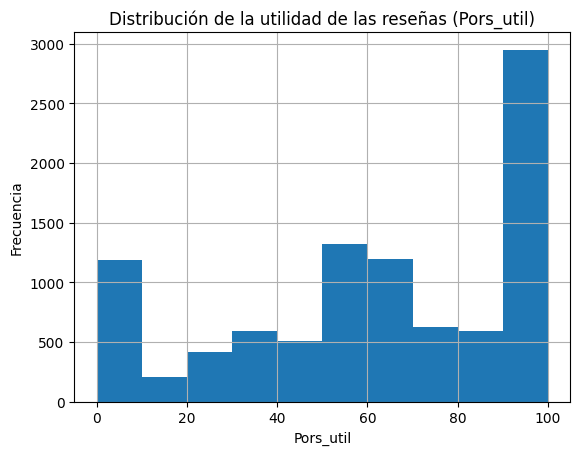

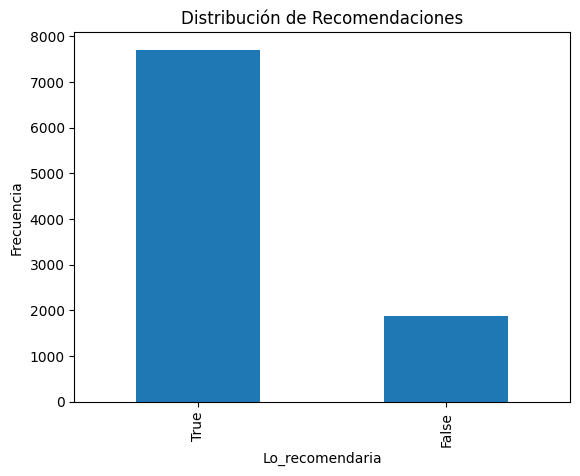

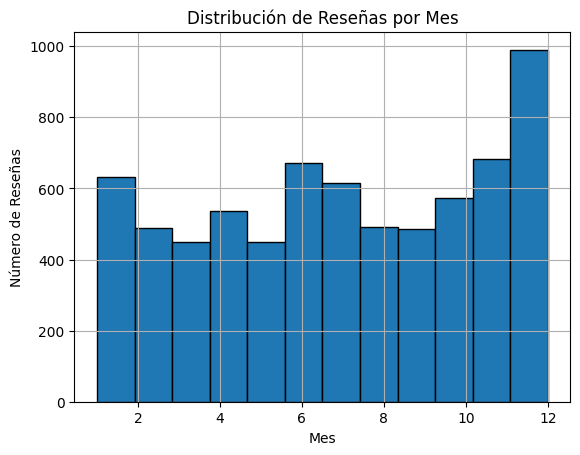

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

# Histograma para la distribución de 'Pors_util'
df_cleaned['Pors_util'].hist(bins=10)
plt.title('Distribución de la utilidad de las reseñas (Pors_util)')
plt.xlabel('Pors_util')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras para la columna 'Lo_recomendaria'
df_cleaned['Lo_recomendaria'].value_counts().plot(kind='bar')
plt.title('Distribución de Recomendaciones')
plt.xlabel('Lo_recomendaria')
plt.ylabel('Frecuencia')
plt.show()

# Extraer el mes de la columna 'Fecha_de_post' utilizando .loc[]
df_cleaned.loc[:, 'Mes'] = pd.to_datetime(df_cleaned['Fecha_de_post'], errors='coerce').dt.month

# Histograma de los meses
df_cleaned['Mes'].hist(bins=12, edgecolor='black')
plt.title('Distribución de Reseñas por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Reseñas')
plt.show()


Histograma de Pors_util

:

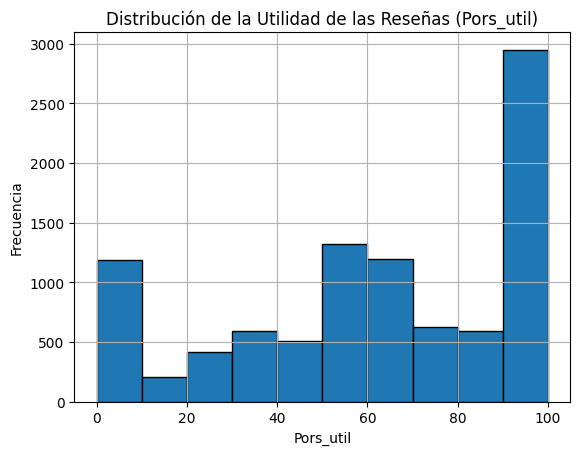

In [11]:
# Histograma de la utilidad de las reseñas
df_cleaned['Pors_util'].hist(bins=10, edgecolor='black')
plt.title('Distribución de la Utilidad de las Reseñas (Pors_util)')
plt.xlabel('Pors_util')
plt.ylabel('Frecuencia')
plt.show()

Analisia de sentimientos.
En este punto la columna a la comentarios prosedemos a aplicarle un analisis de sentimientosetiquetando las reseñas con: 0(malo), 1(neutral o no hay cometario),2(pocitivo) y se cambia el nombre de la coluna de Comentarios a Analisis_sentimientos

In [63]:
#Cargamos data Frame

file_path = '/content/reseñas.csv'
df = pd.read_csv(file_path)

# Revisamos que no haya espacios filas vacias en la columna comentarios
df['Comentario'] = df['Comentario'].fillna('')


In [64]:
# Verificar si hay inconsistencias en el número de columnas
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9590 entries, 0 to 9589
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id_usuario       9590 non-null   object 
 1   Url_usuario      9590 non-null   object 
 2   Id_de_post       9590 non-null   int64  
 3   Fecha_de_post    9590 non-null   object 
 4   Lo_recomendaria  9590 non-null   bool   
 5   Utilidad         9590 non-null   int64  
 6   No_Utilidad      9590 non-null   int64  
 7   Pors_util        9590 non-null   float64
 8   Comentario       9590 non-null   object 
dtypes: bool(1), float64(1), int64(3), object(4)
memory usage: 608.9+ KB
None
  Id_usuario                             Url_usuario  Id_de_post  \
0  maplemage  http://steamcommunity.com/id/maplemage      211420   
1  maplemage  http://steamcommunity.com/id/maplemage      211820   
2  maplemage  http://steamcommunity.com/id/maplemage         730   
3     Wackky     http://steamcommunity

Analisis_sentimientos
2    5483
1    2534
0    1573
Name: count, dtype: int64


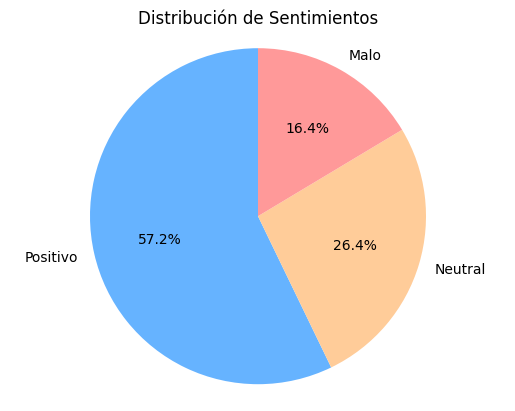

In [65]:
df = pd.read_csv('/content/reseñas.csv')

if 'Analisis_sentimientos' not in df.columns:

    # Creamos un objeto analizador VADER
    analyzer = SentimentIntensityAnalyzer()

    # Función para detectar el idioma y traducir si es necesario ,en caso de precentar un error devulelve neutral
    def detectar_y_analizar_sentimiento(texto):
        try:
            idioma = detect(texto)
            if idioma == 'en':
                polaridad = analyzer.polarity_scores(texto)['compound']
                return polaridad
            else:
                texto_traducido = TextBlob(texto).translate(to='en')
                polaridad = analyzer.polarity_scores(str(texto_traducido))['compound']
                return polaridad
        except Exception:
            return 0

    # Aplicar la función a la columna 'Comentario'
    df['polaridad_vader'] = df['Comentario'].apply(detectar_y_analizar_sentimiento)

    # Función para asignar la puntuación basada en la polaridad
    def asignar_sentimiento(polaridad):
        if polaridad <= -0.05:
            return 0
        elif polaridad >= 0.05:
            return 2
        else:
            return 1

    # Reemplazar la columna 'Comentario' con los análisis de sentimientos
    df['Analisis_sentimientos'] = df['polaridad_vader'].apply(asignar_sentimiento)

    df = df.drop(columns=['polaridad_vader'])

    df.to_csv('/content/reseñas.csv', index=False)
print(df['Analisis_sentimientos'].value_counts())

# Creamos  una gráfica de torta
sentimientos_frecuencia = df['Analisis_sentimientos'].value_counts()
etiquetas = ['Positivo', 'Neutral', 'Malo']
tamaños = [sentimientos_frecuencia.get(2, 0), sentimientos_frecuencia.get(1, 0), sentimientos_frecuencia.get(0, 0)]

plt.pie(tamaños, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ffcc99', '#ff9999'])
plt.axis('equal')
plt.title('Distribución de Sentimientos')
plt.show()


In [66]:
# Cargar el archivo CSV
df = pd.read_csv('/content/reseñas.csv')

# Eliminamos la columna 'Comentario'
df = df.drop(columns=['Comentario'])  # O también puedes usar df.drop('Comentario', axis=1, inplace=True)

# Guardar el DataFrame limpio en un nuevo archivo CSV
df.to_csv('/content/reseñas.csv', index=False)

print("La columna 'Comentario' ha sido eliminada y el archivo ha sido guardado como 'archivo_limpio.csv'.")



La columna 'Comentario' ha sido eliminada y el archivo ha sido guardado como 'archivo_limpio.csv'.


In [57]:
# Función para verificar si un valor es numérico
def es_numerico(valor):
    try:
        float(valor)
        return True
    except ValueError:
        return False

# Aplicar la función a la columna 'Id_usuarios', reemplazando los valores no numéricos por NaN
df['Id_usuario'] = df['Id_usuario'].apply(lambda x: x if es_numerico(x) else np.nan)
# Eliminar las filas donde 'Id_usuarios' no sean numérico
df = df[df['Id_usuario'].apply(es_numerico)]
# Guardadamos el DataFrame
df.to_csv('/content/reseñas.csv', index=False)
